Notebook for Demographic Dataframe Collection
This notebook combines all of the csv files into one dataframe.

# References

Colab Debug was used to modify "for column in demographic_columns_list" renaming loop.

Demographic csv file:
Pew Research Center. (2024, April 9). Changing partisan coalitions in a politically divided nation. Pew Research Center. Retrieved from https://www.pewresearch.org/politics/2024/04/09/changing-partisan-coalitions-in-a-politically-divided-nation/

In [34]:
# Install the required libraries
!pip install prophet


In [35]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

In [36]:
# Upload the .csv file
from google.colab import files
uploaded = files.upload()

Saving Aggregate-Data-Demographic.csv to Aggregate-Data-Demographic (1).csv


In [73]:
# Store the data in a Pandas DataFrame
# demographic_df = pd.read_csv(("Aggregate-Data-Demographic.csv"))
demographic_df = pd.read_csv(("Aggregate-Data-Demographic.csv"),
    index_col='Year',
    parse_dates=True
)
# Review DataFrame
demographic_df.head()

,Rep/Lean Rep,Dem/Lean Dem,Men Rep/Lean Rep,Men Dem/Lean Dem,Women Rep/Lean Rep,Women Dem/Lean Dem,"White, non-Hispanic Rep/Lean Rep","White, non-Hispanic Dem/Lean Dem",Hispanic Rep/Lean Rep,Hispanic Dem/Lean Dem,...,Jewish Rep/Lean Rep,Jewish Dem/Lean Dem,All unaffiliated Rep/Lean Rep,All unaffiliated Dem/Lean Dem,Atheist Rep/Lean Rep,Atheist Dem/Lean Dem,Agnostic Rep/Lean Rep,Agnostic Dem/Lean Dem,Nothing in particular Rep/Lean Rep,Nothing in particular Dem/Lean Dem
Year,,,,,,,,,,,,,,,,,,,,,
1994-01-01,51,47,56,42,46,52,55,42,NaN,NaN,...,26,72,38,58,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-01,50,48,56,43,46,52,55,43,NaN,NaN,...,29,70,41,55,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-01,48,51,53,45,43,55,53,46,NaN,NaN,...,29,70,36,62,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,46,51,53,45,41,57,51,47,NaN,NaN,...,30,68,33,62,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01,46,51,51,47,42,56,51,46,NaN,NaN,...,27,72,31,65,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Review column headers for type
demographic_df.columns.map(type)

Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'st

In [75]:
# List Available Column Titles
demographic_columns_list=demographic_df.columns.tolist()
display(demographic_columns_list)

['Rep/Lean Rep',
 'Dem/Lean Dem',
 'Men Rep/Lean Rep',
 'Men Dem/Lean Dem',
 'Women Rep/Lean Rep',
 'Women Dem/Lean Dem',
 'White, non-Hispanic Rep/Lean Rep',
 'White, non-Hispanic Dem/Lean Dem',
 'Hispanic Rep/Lean Rep',
 'Hispanic Dem/Lean Dem',
 'Black, non-Hispanic Rep/Lean Rep',
 'Black, non-Hispanic Dem/Lean Dem',
 'Asian, non-Hispanic Rep/Lean Rep',
 'Asian, non-Hispanic Dem/Lean Dem',
 'Urban Rep/Lean Rep',
 'Urban Dem/Lean Dem',
 "Suburban 'Rep/Lean Rep",
 'Suburban Dem/Lean Dem',
 'Rural Rep/Lean Rep',
 'Rural Dem/Lean Dem',
 'Born in 1940s Rep/Lean Rep',
 'Born in 1940s Dem/Lean Dem',
 'Born in 1950s Rep/Lean Rep',
 'Born in 1950s Dem/Lean Dem',
 'Born in 1960s Rep/Lean Rep',
 'Born in 1960s Dem/Lean Dem',
 'Born in 1970s Rep/Lean Rep',
 'Born in 1970s Dem/Lean Dem',
 'Born in 1980s Rep/Lean Rep',
 'Born in 1980s Dem/Lean Dem',
 'Born in 1990s Rep/Lean Rep',
 'Born in 1990s Dem/Lean Dem',
 'All Protestants Rep/Lean Rep',
 'All Protestants Dem/Lean Dem',
 'White evangelical P

In [76]:
# Rename the columns, referencing that Rep/Lean Rep and Dem/Lean Dem are equivalent to "Republican/Leaning Republican" etc.
for column in demographic_columns_list:
    index = demographic_columns_list.index(column)
    demographic_df.rename(columns={column: column.replace("/Lean Rep", "").replace("/Lean Dem", "")}, inplace=True)
# List Modified Column Titles
demographic_columns_list=demographic_df.columns.tolist()
display(demographic_columns_list)
print("Note -- Republican and Democrat includes identify as Republican or Democratic as well as 'Leans Republican' or 'Leans Democrat' ")
# Reference:  Colab Debug for index and replace arguments

['Rep',
 'Dem',
 'Men Rep',
 'Men Dem',
 'Women Rep',
 'Women Dem',
 'White, non-Hispanic Rep',
 'White, non-Hispanic Dem',
 'Hispanic Rep',
 'Hispanic Dem',
 'Black, non-Hispanic Rep',
 'Black, non-Hispanic Dem',
 'Asian, non-Hispanic Rep',
 'Asian, non-Hispanic Dem',
 'Urban Rep',
 'Urban Dem',
 "Suburban 'Rep",
 'Suburban Dem',
 'Rural Rep',
 'Rural Dem',
 'Born in 1940s Rep',
 'Born in 1940s Dem',
 'Born in 1950s Rep',
 'Born in 1950s Dem',
 'Born in 1960s Rep',
 'Born in 1960s Dem',
 'Born in 1970s Rep',
 'Born in 1970s Dem',
 'Born in 1980s Rep',
 'Born in 1980s Dem',
 'Born in 1990s Rep',
 'Born in 1990s Dem',
 'All Protestants Rep',
 'All Protestants Dem',
 'White evangelical Protestant Rep',
 'White evangelical Protestant Dem',
 'White nonevangelical Protestant Rep',
 'White nonevangelical Protestant Dem',
 'Black Protestant Rep',
 'Black Protestant Dem',
 'Hispanic Protestant* Rep',
 'Hispanic Protestant* Dem',
 'All catholics Rep',
 'All catholics Dem',
 'White Catholic Rep'

Note -- Republican and Democrat includes identify as Republican or Democratic as well as 'Leans Republican' or 'Leans Democrat' 


In [77]:
# Review the data types of the DataFrame using the info function
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 1994-01-01 to 2023-01-01
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rep                                  30 non-null     int64  
 1   Dem                                  30 non-null     int64  
 2   Men Rep                              30 non-null     int64  
 3   Men Dem                              30 non-null     int64  
 4   Women Rep                            30 non-null     int64  
 5   Women Dem                            30 non-null     int64  
 6   White, non-Hispanic Rep              30 non-null     int64  
 7   White, non-Hispanic Dem              30 non-null     int64  
 8   Hispanic Rep                         18 non-null     float64
 9   Hispanic Dem                         18 non-null     float64
 10  Black, non-Hispanic Rep              30 non-null     int64  
 11  Black, non-His

# Demographic Analysis:  Groups Republican/Leaning Republican and Democrat/Leaning Democrat
## Compare these values to the overall voter election results.
Compare the predicted results using demographic data to the overall election results predicted from final vote counts 2000 to 2020.

## Demographic:  Republican and Leaning Republican (1994 to 2023)

In [78]:
# Republican Demographic
republican = demographic_df.loc["1994-01-01":"2023-01-01"][["Rep"]]
display(republican.head())
republican.tail()

,Rep
Year,
1994-01-01,51
1995-01-01,50
1996-01-01,48
1997-01-01,46
1998-01-01,46


,Rep
Year,
2019-01-01,46
2020-01-01,46
2021-01-01,46
2022-01-01,48
2023-01-01,48


<Axes: title={'center': 'Republicans'}, xlabel='Year'>

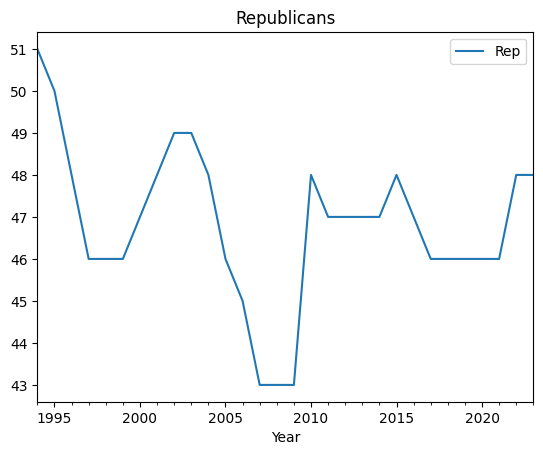

In [79]:
# Plot demographic
republican.plot(title="Republicans")

Start Prophet Model for Demographic:  Republican

In [80]:
# Generate Prophet Model for Next Year
# Using the demographic DataFrame, reset the index so the date information is no longer the index
republican_prophet_df = republican.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
republican_prophet_df.columns = ['ds', 'y']
# Drop an NaN values from the prophet_df DataFrame
republican_prophet_df = republican_prophet_df.dropna()
# View the DataFrame
display(republican_prophet_df.tail())


,ds,y
25,2019-01-01,46
26,2020-01-01,46
27,2021-01-01,46
28,2022-01-01,48
29,2023-01-01,48


In [81]:
# Call the Prophet function, store as an object
model_republican = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_republican.fit(republican_prophet_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy9rrmemd/q28irgwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy9rrmemd/_l099rn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64007', 'data', 'file=/tmp/tmpy9rrmemd/q28irgwh.json', 'init=/tmp/tmpy9rrmemd/_l099rn0.json', 'output', 'file=/tmp/tmpy9rrmemd/prophet_modelmu3fyb6p/prophet_model-20240526232858.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:28:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:28:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [82]:
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_republican_trends = model_republican.make_future_dataframe(periods=1, freq="A")

# View the last five rows of the future DataFrame
display(future_republican_trends.tail())

,ds
26,2020-01-01
27,2021-01-01
28,2022-01-01
29,2023-01-01
30,2023-12-31


In [83]:
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_republican_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
future_republican_trends

,ds
0,1994-01-01
1,1995-01-01
2,1996-01-01
3,1997-01-01
4,1998-01-01
5,1999-01-01
6,2000-01-01
7,2001-01-01
8,2002-01-01
9,2003-01-01


In [84]:
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_republican_trends=model_republican.predict(future_republican_trends)

# Display the last five rows of the forecast_*_trends DataFrame
forecast_republican_trends.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
26,2020-01-01,46.710293,44.790465,48.662716,46.710293,46.710293,0.0,0.0,0.0,0.0,0.0,0.0,46.710293
27,2021-01-01,46.772589,44.859017,48.807677,46.772589,46.772589,0.0,0.0,0.0,0.0,0.0,0.0,46.772589
28,2022-01-01,46.834715,44.949488,48.871709,46.834715,46.834715,0.0,0.0,0.0,0.0,0.0,0.0,46.834715
29,2023-01-01,46.896841,44.975809,48.862409,46.896841,46.896841,0.0,0.0,0.0,0.0,0.0,0.0,46.896841
30,2024-01-01,46.958967,45.080109,48.877492,46.952093,46.966723,0.0,0.0,0.0,0.0,0.0,0.0,46.958967


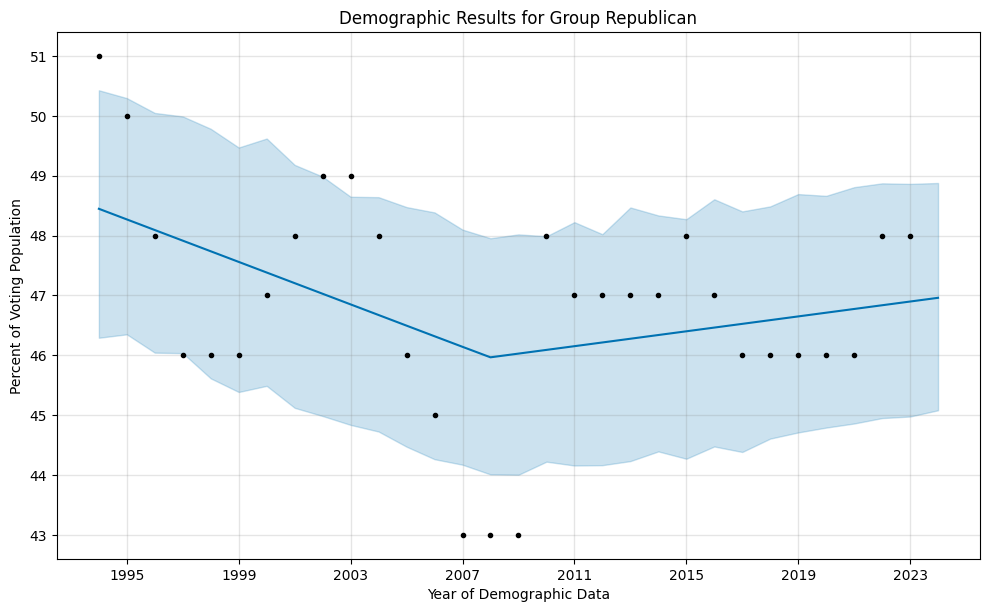

In [85]:
# Plot the Prophet predictions for the trends data
# model_republican.plot(forecast_republican_trends)
from matplotlib import pyplot as plt
fig = model_republican.plot(forecast_republican_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Republican')
plt.show()

In [86]:
# Show forecast_republican_trends
forecast_republican_trends.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
26,2020-01-01,46.710293,44.790465,48.662716,46.710293,46.710293,0.0,0.0,0.0,0.0,0.0,0.0,46.710293
27,2021-01-01,46.772589,44.859017,48.807677,46.772589,46.772589,0.0,0.0,0.0,0.0,0.0,0.0,46.772589
28,2022-01-01,46.834715,44.949488,48.871709,46.834715,46.834715,0.0,0.0,0.0,0.0,0.0,0.0,46.834715
29,2023-01-01,46.896841,44.975809,48.862409,46.896841,46.896841,0.0,0.0,0.0,0.0,0.0,0.0,46.896841
30,2024-01-01,46.958967,45.080109,48.877492,46.952093,46.966723,0.0,0.0,0.0,0.0,0.0,0.0,46.958967


In [87]:
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_republican_trends = forecast_republican_trends.set_index('ds')
# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_republican_trends[["yhat","yhat_lower","yhat_upper"]]

,yhat,yhat_lower,yhat_upper
ds,,,
1994-01-01,48.446277,46.291652,50.426506
1995-01-01,48.268921,46.348796,50.295665
1996-01-01,48.091566,46.042657,50.047679
1997-01-01,47.913724,46.034478,49.989247
1998-01-01,47.736368,45.612633,49.782681
1999-01-01,47.559013,45.385423,49.470290
2000-01-01,47.381657,45.487896,49.620143
2001-01-01,47.203815,45.120579,49.179528
2002-01-01,47.026460,44.984105,48.984047


In [92]:
#Rename yhat yhat_lower yhat_ upper
forecast_republican_trends = forecast_republican_trends.rename(
    columns={
        "yhat_upper": "Rep Best",
        "yhat_lower": "Rep Worst",
        "yhat": "Rep Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_republican_trends_y_only = forecast_republican_trends[['Rep Most Likely','Rep Best','Rep Worst']]
forecast_republican_trends_y_only.head()

,Rep Most Likely,Rep Best,Rep Worst
ds,,,
1994-01-01,48.446277,50.426506,46.291652
1995-01-01,48.268921,50.295665,46.348796
1996-01-01,48.091566,50.047679,46.042657
1997-01-01,47.913724,49.989247,46.034478
1998-01-01,47.736368,49.782681,45.612633


In [93]:
forecast_republican_trends_y_only.dtypes

Rep Most Likely    float64
Rep Best           float64
Rep Worst          float64
dtype: object

In [94]:
# prompt: round columns rep most likely, rep best, and rep worst to zero digits (Reference: AI assist debug)
forecast_republican_trends_y_only = forecast_republican_trends_y_only.round(decimals=1)
forecast_republican_trends_y_only.head()


,Rep Most Likely,Rep Best,Rep Worst
ds,,,
1994-01-01,48.4,50.4,46.3
1995-01-01,48.3,50.3,46.3
1996-01-01,48.1,50.0,46.0
1997-01-01,47.9,50.0,46.0
1998-01-01,47.7,49.8,45.6


<Axes: title={'center': 'Model: Republicans 1994 to 2024'}, xlabel='ds'>

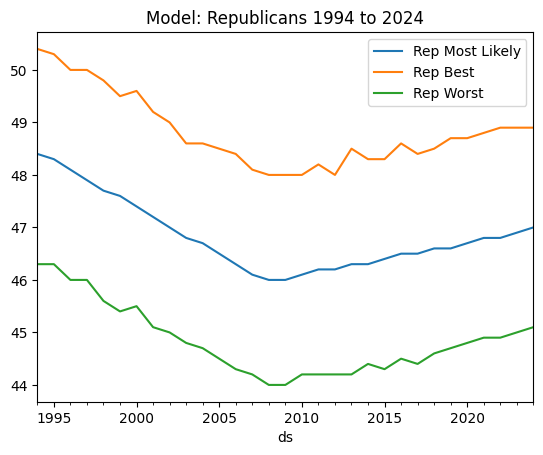

In [95]:
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_republican_trends_y_only[['Rep Most Likely','Rep Best','Rep Worst']].plot(title='Model: Republicans 1994 to 2024')

## Demographic A2:  Democrat and Leaning Democrat (1994 to 2023)

In [54]:
# Democrat Demographic
democrat = demographic_df.loc["1994-01-01":"2023-01-01"][["Dem"]]
display(democrat.head())
democrat.tail()

,Dem
Year,
1994-01-01,47
1995-01-01,48
1996-01-01,51
1997-01-01,51
1998-01-01,51


,Dem
Year,
2019-01-01,51
2020-01-01,51
2021-01-01,50
2022-01-01,48
2023-01-01,49


<Axes: title={'center': 'Democrats'}, xlabel='Year'>

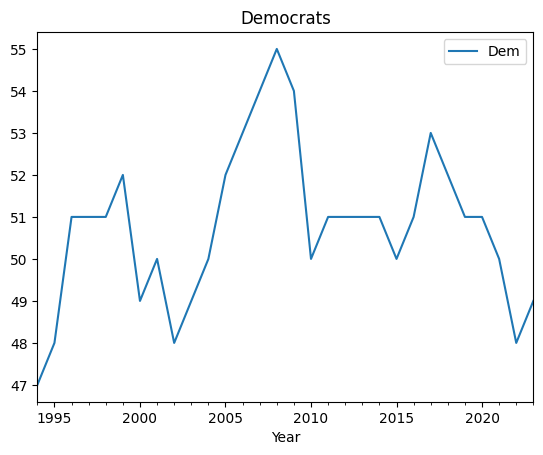

In [55]:
# Plot demographic
democrat.plot(title="Democrats")

### Start Prophet Model for Demographic:  Democrat

In [56]:
# Generate Prophet Model for Next Year
# Using the demographic DataFrame, reset the index so the date information is no longer the index
democrat_prophet_df = democrat.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
democrat_prophet_df.columns = ['ds', 'y']
# Drop an NaN values from the prophet_df DataFrame
democrat_prophet_df = democrat_prophet_df.dropna()
# View the DataFrame
display(democrat_prophet_df.tail())

,ds,y
25,2019-01-01,51
26,2020-01-01,51
27,2021-01-01,50
28,2022-01-01,48
29,2023-01-01,49


In [57]:
# Call the Prophet function, store as an object
model_democrat = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_democrat.fit(democrat_prophet_df)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy9rrmemd/94hxc9r8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy9rrmemd/8ktpf0fb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36382', 'data', 'file=/tmp/tmpy9rrmemd/94hxc9r8.json', 'init=/tmp/tmpy9rrmemd/8ktpf0fb.json', 'output', 'file=/tmp/tmpy9rrmemd/prophet_model6z72nrk3/prophet_model-20240526214505.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:45:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:45:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [58]:
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_democrat_trends = model_democrat.make_future_dataframe(periods=1, freq="A")

# View the last five rows of the future DataFrame
display(future_democrat_trends.tail())

,ds
26,2020-01-01
27,2021-01-01
28,2022-01-01
29,2023-01-01
30,2023-12-31


In [59]:
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_democrat_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
future_democrat_trends.tail()

,ds
26,2020-01-01
27,2021-01-01
28,2022-01-01
29,2023-01-01
30,2024-01-01


In [60]:
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_democrat_trends=model_democrat.predict(future_democrat_trends)
# Display the last five rows of the forecast_*_trends DataFrame
forecast_democrat_trends.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
26,2020-01-01,50.484200,48.489732,52.354477,50.484200,50.484200,0.0,0.0,0.0,0.0,0.0,0.0,50.484200
27,2021-01-01,50.361910,48.446588,52.254262,50.361910,50.361910,0.0,0.0,0.0,0.0,0.0,0.0,50.361910
28,2022-01-01,50.239953,48.285798,52.125412,50.239953,50.239953,0.0,0.0,0.0,0.0,0.0,0.0,50.239953
29,2023-01-01,50.117997,48.134083,52.086413,50.117997,50.117997,0.0,0.0,0.0,0.0,0.0,0.0,50.117997
30,2024-01-01,49.996040,48.055198,51.950599,49.985883,50.006035,0.0,0.0,0.0,0.0,0.0,0.0,49.996040


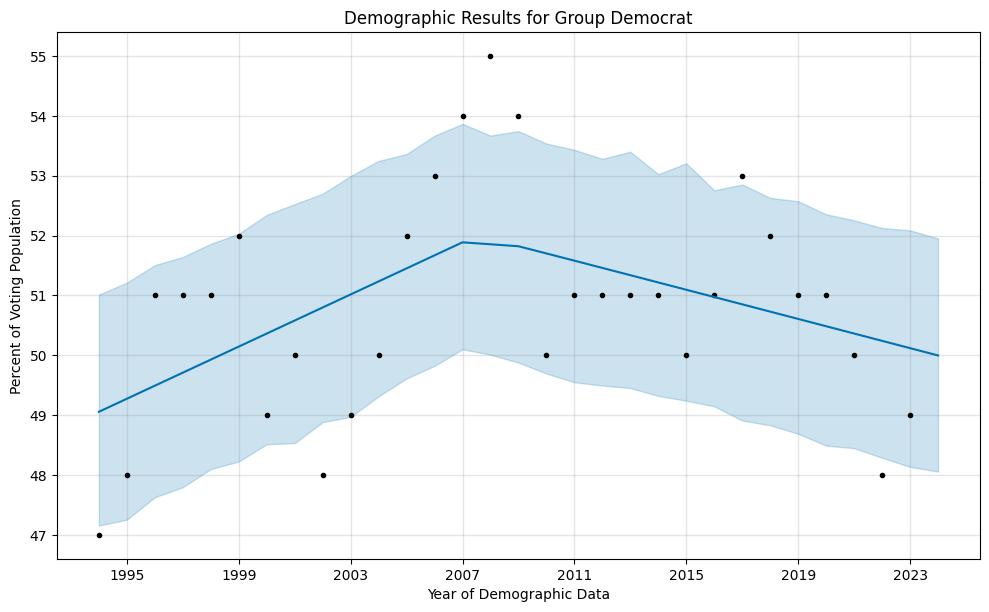

In [61]:
# Plot the Prophet predictions for the trends data
# model_republican.plot(forecast_republican_trends)
from matplotlib import pyplot as plt
fig = model_democrat.plot(forecast_democrat_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Democrat')
plt.show()

In [62]:
# Show forecast_democrat_trends
forecast_democrat_trends.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
26,2020-01-01,50.484200,48.489732,52.354477,50.484200,50.484200,0.0,0.0,0.0,0.0,0.0,0.0,50.484200
27,2021-01-01,50.361910,48.446588,52.254262,50.361910,50.361910,0.0,0.0,0.0,0.0,0.0,0.0,50.361910
28,2022-01-01,50.239953,48.285798,52.125412,50.239953,50.239953,0.0,0.0,0.0,0.0,0.0,0.0,50.239953
29,2023-01-01,50.117997,48.134083,52.086413,50.117997,50.117997,0.0,0.0,0.0,0.0,0.0,0.0,50.117997
30,2024-01-01,49.996040,48.055198,51.950599,49.985883,50.006035,0.0,0.0,0.0,0.0,0.0,0.0,49.996040


In [63]:
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_democrat_trends = forecast_democrat_trends.set_index('ds')
# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_democrat_trends[["yhat","yhat_lower","yhat_upper"]]

,yhat,yhat_lower,yhat_upper
ds,,,
1994-01-01,49.054885,47.154236,51.012343
1995-01-01,49.272547,47.251986,51.211702
1996-01-01,49.490208,47.626941,51.504618
1997-01-01,49.708467,47.794407,51.640836
1998-01-01,49.926128,48.097169,51.860886
1999-01-01,50.143790,48.223986,52.027906
2000-01-01,50.361452,48.512719,52.343464
2001-01-01,50.579710,48.531891,52.525265
2002-01-01,50.797372,48.882005,52.698163


In [64]:
#Rename yhat yhat_lower yhat_ upper
forecast_democrat_trends = forecast_democrat_trends.rename(
    columns={
        "yhat_upper": "Dem Best",
        "yhat_lower": "Dem Worst",
        "yhat": "Dem Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_democrat_trends_y_only = forecast_democrat_trends[['Dem Most Likely','Dem Best','Dem Worst']]
forecast_democrat_trends_y_only.head()

,Dem Most Likely,Dem Best,Dem Worst
ds,,,
1994-01-01,49.054885,51.012343,47.154236
1995-01-01,49.272547,51.211702,47.251986
1996-01-01,49.490208,51.504618,47.626941
1997-01-01,49.708467,51.640836,47.794407
1998-01-01,49.926128,51.860886,48.097169


In [96]:
# Round columns(Reference: AI assist debug)
forecast_democrat_trends_y_only = forecast_democrat_trends_y_only.round(decimals=1)
forecast_democrat_trends_y_only.head()

,Dem Most Likely,Dem Best,Dem Worst
ds,,,
1994-01-01,49.1,51.0,47.2
1995-01-01,49.3,51.2,47.3
1996-01-01,49.5,51.5,47.6
1997-01-01,49.7,51.6,47.8
1998-01-01,49.9,51.9,48.1


<Axes: title={'center': 'Model: Democrats 1994 to 2024'}, xlabel='ds'>

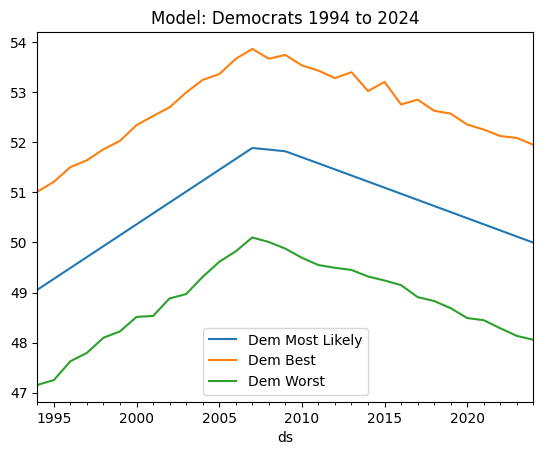

In [97]:
# From the forecast_*_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_democrat_trends[['Dem Most Likely','Dem Best','Dem Worst']].plot(title='Model: Democrats 1994 to 2024')

### Combine Poll Data with Projections (Republican and Democrat)

In [66]:
# Slice Rep and Dem Only from Original Data Base
rep_and_dem_demog=demographic_df[["Rep","Dem"]]
#for debug only vv
rep_and_dem_demog_reported = rep_and_dem_demog
#Rename columns
rep_and_dem_demog_reported = rep_and_dem_demog_reported.rename(
    columns={
        "Rep": "Rep Reported",
        "Dem": "Dem Reported",
    }
)
rep_and_dem_demog_reported.tail()

,Rep Reported,Dem Reported
Year,,
2019-01-01,46,51
2020-01-01,46,51
2021-01-01,46,50
2022-01-01,48,48
2023-01-01,48,49


In [99]:
# Concat Rep and Dem Models from Prophet Output
combined_model_rep_dem = pd.concat([forecast_republican_trends_y_only,forecast_democrat_trends_y_only],axis='columns',join='inner')
combined_model_rep_dem.rename(columns = {'ds':'Year'}, inplace = True)
combined_model_rep_dem.tail()

,Rep Most Likely,Rep Best,Rep Worst,Dem Most Likely,Dem Best,Dem Worst
ds,,,,,,
2020-01-01,46.7,48.7,44.8,50.5,52.4,48.5
2021-01-01,46.8,48.8,44.9,50.4,52.3,48.4
2022-01-01,46.8,48.9,44.9,50.2,52.1,48.3
2023-01-01,46.9,48.9,45.0,50.1,52.1,48.1
2024-01-01,47.0,48.9,45.1,50.0,52.0,48.1


In [100]:
# Concat Reported and Prophet Data Combined
import numpy as np
compare_rep_dem = pd.concat([rep_and_dem_demog_reported,combined_model_rep_dem],axis='columns',join='inner')
compare_rep_dem


,Rep Reported,Dem Reported,Rep Most Likely,Rep Best,Rep Worst,Dem Most Likely,Dem Best,Dem Worst
1994-01-01,51,47,48.4,50.4,46.3,49.1,51.0,47.2
1995-01-01,50,48,48.3,50.3,46.3,49.3,51.2,47.3
1996-01-01,48,51,48.1,50.0,46.0,49.5,51.5,47.6
1997-01-01,46,51,47.9,50.0,46.0,49.7,51.6,47.8
1998-01-01,46,51,47.7,49.8,45.6,49.9,51.9,48.1
1999-01-01,46,52,47.6,49.5,45.4,50.1,52.0,48.2
2000-01-01,47,49,47.4,49.6,45.5,50.4,52.3,48.5
2001-01-01,48,50,47.2,49.2,45.1,50.6,52.5,48.5
2002-01-01,49,48,47.0,49.0,45.0,50.8,52.7,48.9
2003-01-01,49,49,46.8,48.6,44.8,51.0,53.0,49.0


<Axes: title={'center': 'Comparison: Reported Voting and Pew Poll Data'}>

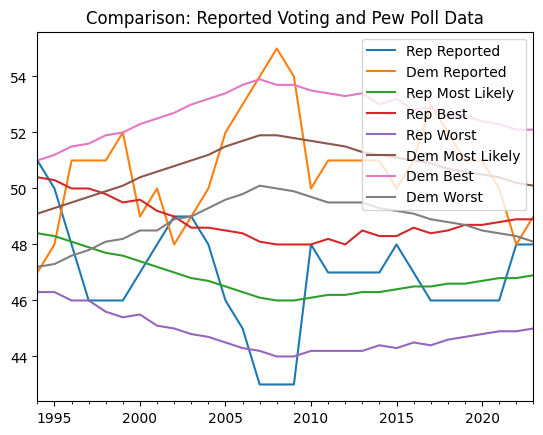

In [101]:
compare_rep_dem[['Rep Reported','Dem Reported','Rep Most Likely','Rep Best','Rep Worst','Dem Most Likely','Dem Best','Dem Worst']].plot(title='Comparison: Reported Voting and Pew Poll Data')

<Axes: title={'center': 'Comparison: Reported Voting Results and Pew Poll Data'}>

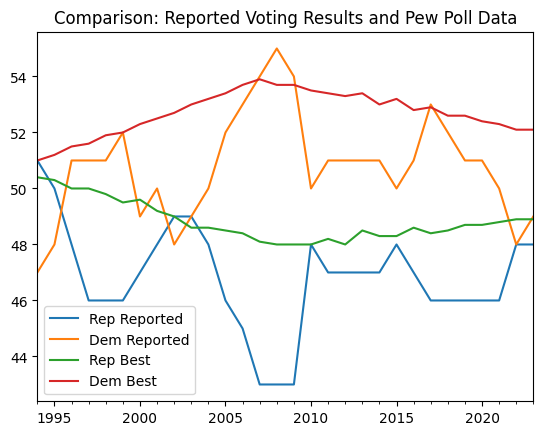

In [103]:
# Clean up data by removing columns
compare_rep_dem[['Rep Reported','Dem Reported','Rep Best','Dem Best']].plot(title='Comparison: Reported Voting Results and Pew Poll Data')


### Analysis:  Reported Voting Results and Pew Data
The Pew Data trends closer to center.
The largest variance is in 2007 and 2008 when Republican candidate votes dropped to 43% and the polled Republican/Leaning Republicaninformation indicated 46% polling.  This was the election cycle for President Obama.


The Democrat/leaning Democrat was at its highest in the same cycle, but
the polling results were closer those years.  The most significant
differences from reported election results to polled for Democrats/Leaning Democrat occuring in non-presidential election years 2002 and 2010.